In [ ]:
#!pip install ipynb

In [3]:
from ipynb.fs.full.readP190 import readP190
from ipynb.fs.full.readSegd import readSegd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import signal
from scipy.fftpack import fft

# Read P190

In [4]:
nav=readP190('MGL1212MCS05.p190')
#nav=readP190('MGL1110MCS07.p190')

In [5]:
nav.__dict__.keys()

dict_keys(['__module__', 'shotNumber', 'depth', 'vesselX', 'vesselY', 'sourceX', 'sourceY', 'tailX', 'tailY', 'receiver_depth', 'receiverX', 'receiverY', '__dict__', '__weakref__', '__doc__'])

In [6]:
nav.depth

array([2625.9, 2628.9, 2626.8, ...,  125.1,  126.4,  126. ])

# Read Segd

In [7]:
header,data=readSegd('R001194_1342434838.RAW')

Skipping Extended Header Blocks
Skipping External Header Blocks


In [9]:
header.__dict__.keys()

dict_keys(['__module__', 'file_number', 'format_code', 'year', 'additional_header_blocks', 'julian_day', 'hour', 'minute', 'second', 'manufacturer_code', 'manufacturer_serial_number', 'bytes_per_scan', 'base_scan_interval', 'polarity_code', 'scans_in_block_exponent', 'scans_in_block_base', 'record_type_code', 'record_length', 'scans_type_per_record', 'channel_set_per_scan_type', 'added_skew_fields', 'extended_header_length', 'external_header_length', 'SEGD_revision', 'general_trailers', 'channel_Set_channels', '__dict__', '__weakref__', '__doc__'])

In [10]:
print(header.year)
print(header.record_length)

2012
16.384


In [11]:
data.shape

(8192, 636)

In [12]:
fs = 500
receiver_num = 70
data_sel = data[:,receiver_num]
t = np.arange(data.shape[0])/fs # time in s

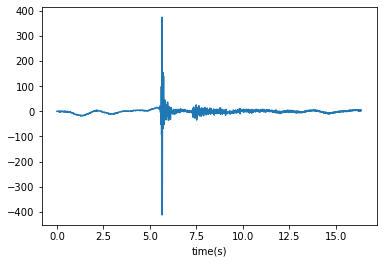

In [13]:
plt.plot(t,data[:,receiver_num])
plt.xlabel('time(s)')
plt.show()

### Filter Data

In [14]:
def filt(data,fmin,fmax):
    sos = signal.butter(6, [fmin, fmax], 'bandpass', fs=500, output='sos')
    #sos=np.array([[1,-2,1,1,-1.82570619168342,0.881881926844246],[1,-2,1,1,-1.65627993129105,0.707242535896459],[1,-2,1,1,-1.57205200320457,0.620422971870477]])
    datafilt = signal.sosfilt(sos, data,axis=0)
    return datafilt

In [15]:
fmin = 20
fmax = 200
datafilt = filt(data,fmin,fmax)

### Calculate FFT

In [16]:
nfft = fs
data_fft = fft(data,nfft,axis=0)
datafilt_fft = fft(datafilt,nfft,axis=0)

(0.0, 200.0)

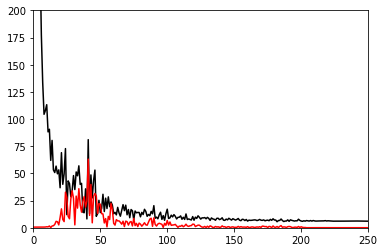

In [17]:
plt.plot(np.abs(data_fft[:,receiver_num]),'k')
plt.plot(np.abs(datafilt_fft[:,receiver_num]),'r')
plt.xlim(0,250)
plt.ylim(0,200)

# Plot Spectrogram

In [30]:
def shot_spectogram(data,index,fs):
    f, t, Sxx = signal.spectrogram(data[:,index]/1e-6,fs,nfft = fs,nperseg = 256,noverlap=int(256*0.8),window ='hanning',scaling='spectrum')
    Sx = 10*(np.log10(Sxx))
    plt.pcolormesh(t,f,Sx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.clim(80,180)
    plt.colorbar()
    plt.ylim(10,230)
    plt.show()

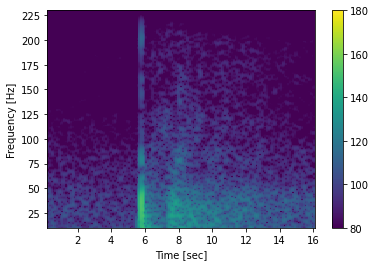

In [31]:
shot_spectogram(data,50,fs)